In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

In [ ]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")

--2022-10-08 14:03:43--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0s      

2022-10-08 14:03:43 (153 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  

In [ ]:
from m_rcnn import *
%matplotlib inline

VERS 0.4 - updated 04/08/2022
... done downloading pretrained model!


In [ ]:
!nvidia-smi

Sat Oct  8 14:04:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Batch3.zip /content/seg_images.zip


In [ ]:
!unzip seg_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/seg_images/folderID639_plateID2639_batchID13961_wellNum73_profileID1_d3_r212681_ef.jpg  
  inflating: content/seg_images/folderID159_plateID1159_batchID3197_wellNum11_profileID1_d1_r61875_ef.jpg  
  inflating: content/seg_images/061o_H12_ImagerDefaults_3.jpg  
  inflating: content/seg_images/05y3_B12_ImagerDefaults_6.jpg  
  inflating: content/seg_images/03cs_C11_ImagerDefaults_9.jpg  
  inflating: content/seg_images/folderID797_plateID2797_batchID14923_wellNum44_profileID1_d2_r230175_ef.jpg  
  inflating: content/seg_images/folderID73_plateID3073_batchID18131_wellNum65_profileID1_d2_r264426_ef.jpg  
  inflating: content/seg_images/X0000044401499200412290418.png  
  inflating: content/seg_images/02p2_G12_ImagerDefaults_3.jpg  
  inflating: content/seg_images/folderID243_plateID3243_batchID20094_wellNum24_profileID1_d1_r283697_ef.jpg  
  inflating: content/seg_images/RI01_03_000_0212_Proj1_Clon1_MC_0000MC102892_001_

In [ ]:
!cp ./seg_images/trainval.json ./trainval.json

In [ ]:
!cp ./seg_images/testval.json ./testval.json

In [ ]:
!rm -r seg_images

In [ ]:
# Extract Images
images_path = "seg_images.zip"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 1192 images


In [ ]:
train_annotations_path = "trainval.json"
test_annotations_path = "testval.json"


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", train_annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", test_annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/trainval.json
Annotation json path:  /content/testval.json
Train: 130
Validation: 2
Classes: 1


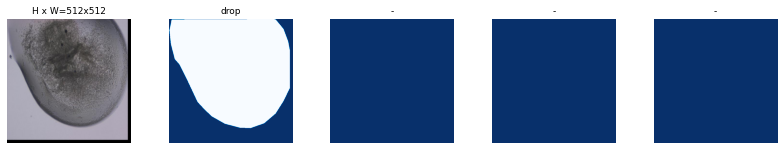

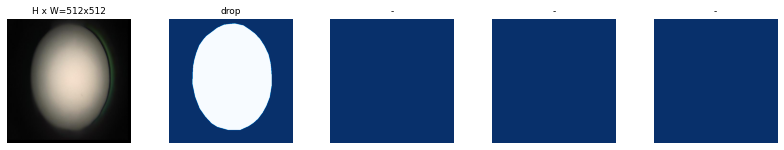

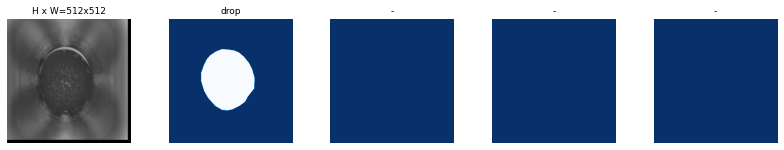

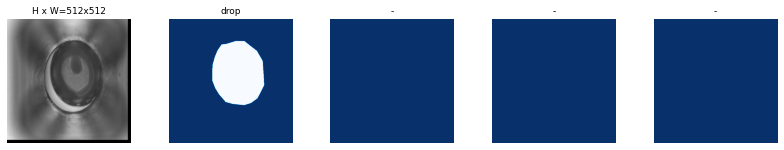

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
!cd maskrcnn_colab

In [ ]:
!mv mask_rcnn_coco.h5 /content/maskrcnn_colab

In [ ]:
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/seg_images_save/object20221005T1137/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mas

In [ ]:
# Load Test Model
# The latest trained model will be loaded from google drive, modified the mrnn.py file as per the requirements of the project
test_model, inference_config = load_test_model(1)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/drive/MyDrive/seg_images_save/object20221005T1137/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [ ]:
path = "/content/content/seg_images/"
test_random_image(test_model, path)  ## I modified this function to suit my requirements, all the
# images in the given path (~10000) are inferenced on the trained model and saved to google drive as segmented images.  
# This allows to get rid of excess data which is not needed (area around the drop in the protein crystallization images)

Streaming output truncated to the last 5000 lines.
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Written image
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Written image
Processing 1 images
image                    shape: (512, 512, 3)         min:   14.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -109.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Written image
Processing 

In [ ]:
import cv2
import glob
import numpy as np
src_folder = r"C:\Users\LEGION\jp_notebook\robotarm1\seg_images\unlabeled"
dst_folder = r"C:\Users\LEGION\jp_notebook\robotarm1\seg_images\labeled\\"
dst_folder1 = r"C:\Users\LEGION\jp_notebook\robotarm1\seg_images\result\\"
src_folder1 = r"C:\Users\LEGION\jp_notebook\robotarm1\seg_images\train\\"

# Search files with .txt extension in source directory
pattern = "\\*.jpg"
files = glob.glob(src_folder + pattern)
print("g0t files")

for file in files:
    src1 = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    src1 = np.asarray(src1)
    shp = np.shape(src1)
    new_img = np.zeros((512,512,3))
    new_img[:shp[0],:shp[1],0] = src1[:,:,0]
    new_img[:shp[0],:shp[1],1] = src1[:,:,1]
    new_img[:shp[0],:shp[1],2] = src1[:,:,2]
    cv2.imwrite(file,new_img)

print("done")

